In [1]:
import numpy as np
from qutip import*
import time
import matplotlib.pyplot as plt
import itertools as it
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
                
Nqubits= 3
Nlevels= 3
Paulis_gt = 2.00e-2
CZ_gt = 2.83e-1
gate_time_CCZS = CZ_gt/(sqrt(2))
Diss = [27.35, 39.73, 34.73]
Alpha = -2*pi*210
ZZ_list = [[0,1]]
ZZ_strength = [0]

In [2]:
def project_to_qubit(rho):
    N = int(len(rho.dims[0]))
    projector = Qobj(np.array([[1, 0, 0],[0, 1, 0]]))
    tot_proj = tensor([projector]*N)
    rho_proj = tot_proj*rho*tot_proj.dag()
    return rho_proj.unit()

In [3]:
T1s = [27.35, 39.73, 34.73]
T2s = [45.21, 57.67, 21.49]

Deph = []
for i in range(3):
    _1byT2 = 1/T2s[i]
    _1byT1 = 1/(2*T1s[i])
    Deph.append(1/(_1byT2 - _1byT1))

In [4]:
# Import the developed package
import Chalmers_Simulator_mesolve as CS

The quantum gates which are modelled in this code and their notations-
--------------------------------------------------------------------------------
Pauli X 		 PX
Pauli Y 		 PY
Pauli Z 		 PZ
Hadamard 		 HD
PI12 			 1->2 transition


Controlled Z 		 CZ 		 Format:Tar_Con=[[control, target]]
Controlled CZS 		 CCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]
Sqrt Controlled CZS 	 SCCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]


0.9768755893202977

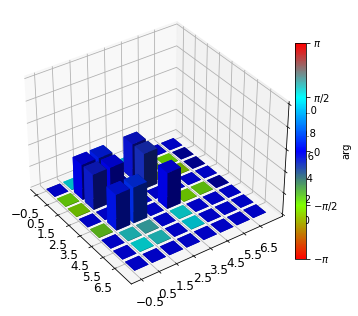

In [50]:
# Create Hamiltonian and collapse operators
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

Ini = tensor(basis(3,0), basis(3,0), basis(3,0))

gate=[]
gate.append(Add_gate(name=["PY"   ], Tar_Con=[0],         angle=[2*np.arccos(1/sqrt(3))]        ))
gate.append(Add_gate(name=["PI12" ], Tar_Con=[0],         angle=[pi]                            ))
gate.append(Add_gate(name=["SCCZS"], Tar_Con=[[0,1,2,0]], angle=[0]                             ))
gate.append(Add_gate(name=["PX"   ], Tar_Con=[0],         angle=[pi]                            ))

# Getting rid of the extra phase
gate.append(Add_gate(name=["PZ"   ], Tar_Con=[2],         angle=[1.056*pi]                      ))

fstate = CS.Execute(Hamiltonian, c_ops, gate, Ini)
visualization.matrix_histogram_complex(project_to_qubit(fstate*fstate.dag()))
W001 = tensor(basis(2,0), basis(2,0), basis(2,1))
W010 = tensor(basis(2,0), basis(2,1), basis(2,0))
W100 = tensor(basis(2,1), basis(2,0), basis(2,0))
Wstate = (W001 + W010 + W100).unit()
fidelity(ket2dm(Wstate), project_to_qubit((fstate)))**2

## Noisefree

0.9917234763382833

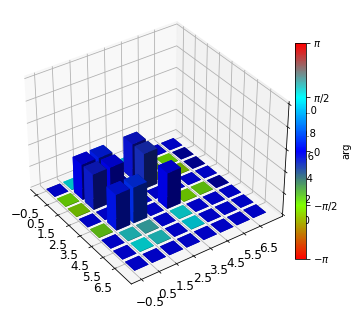

In [45]:
# Noisefree
gate=[]
gate.append(Add_gate(name=["PY"   ], Tar_Con=[0],         angle=[2*np.arccos(1/sqrt(3))]        ))
gate.append(Add_gate(name=["PI12" ], Tar_Con=[0],         angle=[pi]                            ))
gate.append(Add_gate(name=["SCCZS"], Tar_Con=[[0,1,2,0]], angle=[0]                             ))
gate.append(Add_gate(name=["PX"   ], Tar_Con=[0],         angle=[pi]                            ))

# Getting rid of the extra phase
gate.append(Add_gate(name=["PZ"   ], Tar_Con=[2],         angle=[1.056*pi]                      ))

fstate = CS.Execute(Hamiltonian, [], gate, Ini)
visualization.matrix_histogram_complex(project_to_qubit(fstate*fstate.dag()))
W001 = tensor(basis(2,0), basis(2,0), basis(2,1))
W010 = tensor(basis(2,0), basis(2,1), basis(2,0))
W100 = tensor(basis(2,1), basis(2,0), basis(2,0))
Wstate = (W001 + W010 + W100).unit()
fidelity(ket2dm(Wstate), project_to_qubit(ket2dm(fstate)))

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x25767363490>)

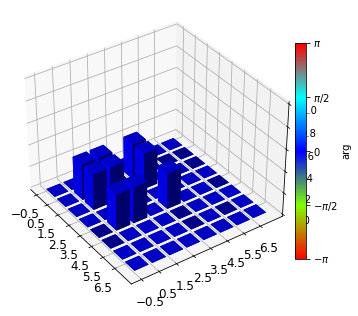

In [6]:
W001 = tensor(basis(2,0), basis(2,0), basis(2,1))
W010 = tensor(basis(2,0), basis(2,1), basis(2,0))
W100 = tensor(basis(2,1), basis(2,0), basis(2,0))
Wstate = (W001 + W010 + W100).unit()
visualization.matrix_histogram_complex(ket2dm(Wstate))

In [48]:
Qobj(project_to_qubit(fstate).diag())

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.00417101]
 [0.32942716]
 [0.32971862]
 [0.        ]
 [0.33523378]
 [0.00072445]
 [0.00072498]
 [0.        ]]

In [49]:
Qobj(ket2dm(Wstate).diag())

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.        ]
 [0.33333333]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]]

In [36]:
# Fidelity of SCCZS gate

Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

Ini = tensor(basis(3,2), basis(3,0), basis(3,0))
Fin = (tensor(basis(3,1), basis(3,1), basis(3,0)) + tensor(basis(3,1), basis(3,0), basis(3,1))).unit()

gate = []
gate.append(Add_gate(name=["SCCZS"], Tar_Con=[[0,1,2,0]], angle=[0]                             ))
gate.append(Add_gate(name=["PZ"   ], Tar_Con=[2],         angle=[pi]                            ))


Exstate2 = CS.Execute(Hamiltonian, [], gate, Ini)
print(fidelity(Exstate2, Fin))

1.0000000032882417


In [37]:
Qobj(project_to_qubit(ket2dm(Exstate2)).diag())

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0.5]
 [0. ]]

In [38]:
Qobj(project_to_qubit(ket2dm(Fin)).diag())

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0.5]
 [0. ]]